In [1]:
%matplotlib inline
from pprint import pprint

from plot import plot_two
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting

import itertools
from decimal import Decimal
from montecarlo import conservative

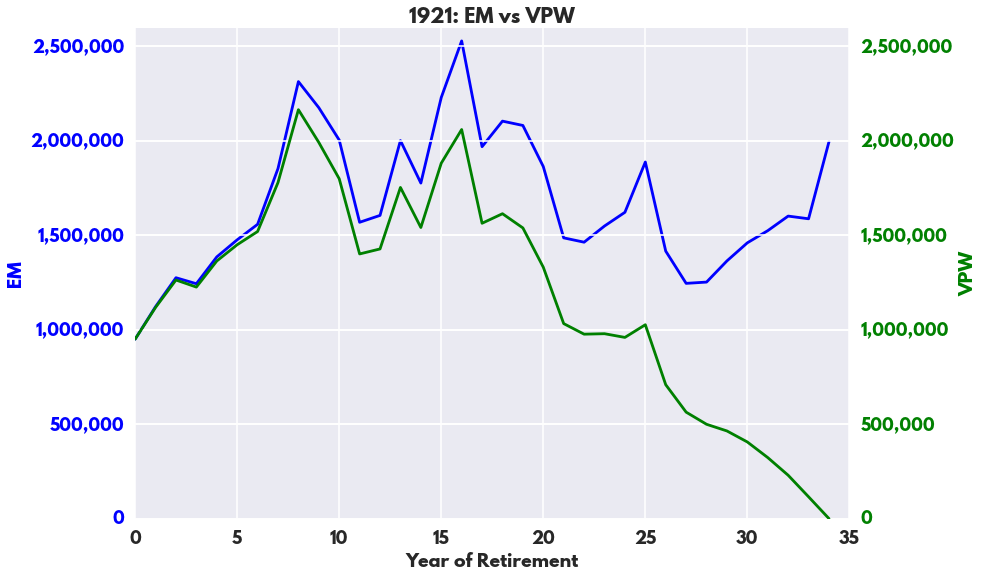

In [2]:
import math
from market import Returns_US_1871
from withdrawal import VPW

def compare_em_vs_vpw(series, years=40, title=''):
    (r1, r2) = itertools.tee(series)
    x = simulate_withdrawals(r1, years=years, harvesting=N_60_RebalanceHarvesting)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting, withdraw=VPW)

    s1 = [n.portfolio_r for n in x]
    s2 = [n.portfolio_r for n in y]

    ceiling = max(max(s1), max(s2))
    if ceiling < 100000:
        ceiling = int(math.ceil(ceiling / 10000) * 10000)
    else:
        ceiling = int(math.ceil(ceiling / 100000) * 100000)
    
    plot_two(s1, s2, s1_title='EM', s2_title='VPW',
                       y_lim=[0,ceiling],
                       x_label='Year of Retirement', title=title)

def em_vs_vpw(year, years=40):
    compare_em_vs_vpw(Returns_US_1871().iter_from(year), title='%d: EM vs VPW' % year, years=years)

# TODO: VPW gets a divide by zero error when I use 40 years...
em_vs_vpw(1921, years=35)

In [3]:
from matplotlib import pyplot as plt
import matplotlib
import plot

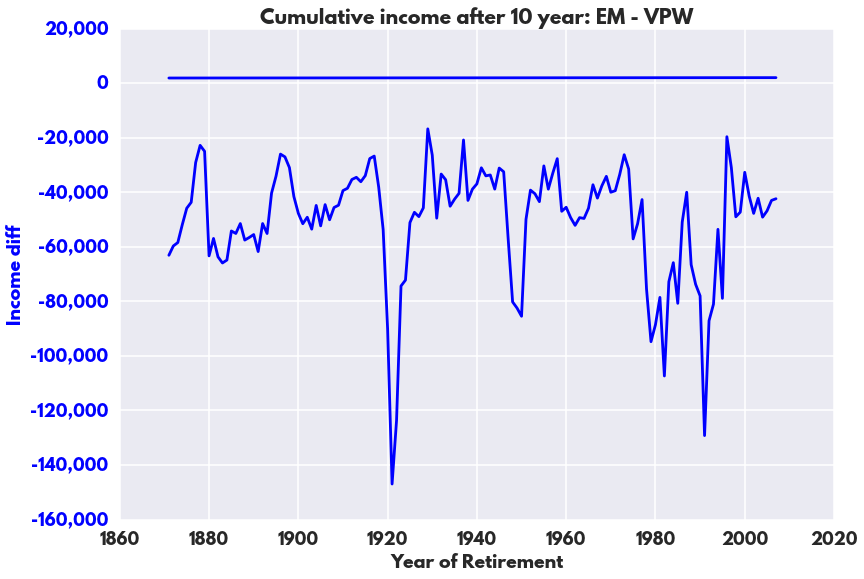

In [4]:
data_series = Returns_US_1871()

income_diff = []

YEARS = 10
for i in range(data_series.years_of_data):
    year = i + 1871

    (s1, s2) = itertools.tee(data_series.iter_from(year))
    x = simulate_withdrawals(s1, years=YEARS, harvesting=N_60_RebalanceHarvesting)
    y = simulate_withdrawals(s2, years=YEARS, harvesting=N_60_RebalanceHarvesting, withdraw=VPW)

    # skip incomplete retirements
    if len(x) < YEARS:
        continue

    em_income = sum([n.withdraw_r for n in x])
    vpw_income = sum([n.withdraw_r for n in y])
    income_diff.append((em_income - vpw_income, year))

x_values = range(1871, 1871 + len(income_diff))

#ylim = [-100000, 50000]

#pprint(sorted(income_diff))

fig, ax1 = plt.subplots()
plot.format_axis_labels_with_commas(ax1.get_yaxis())
ax1.plot(x_values, income_diff, 'b')
#ax1.set_ylim(ylim)
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.set_ylabel('Income diff', color='b')
ax1.set_xlabel('Year of Retirement')

#ax2 = ax1.twinx()
#common.format_axis_labels_with_commas(ax2.get_yaxis())
#ax2.plot(x_values, portfolio_diff, 'g')
#ax2.set_ylim(ylim)
#for tl in ax2.get_yticklabels():
#    tl.set_color('g')
#ax2.set_ylabel('Portfolio diff', color='g')

plt.title('Cumulative income after %d year: EM - VPW' % YEARS)

plt.show()

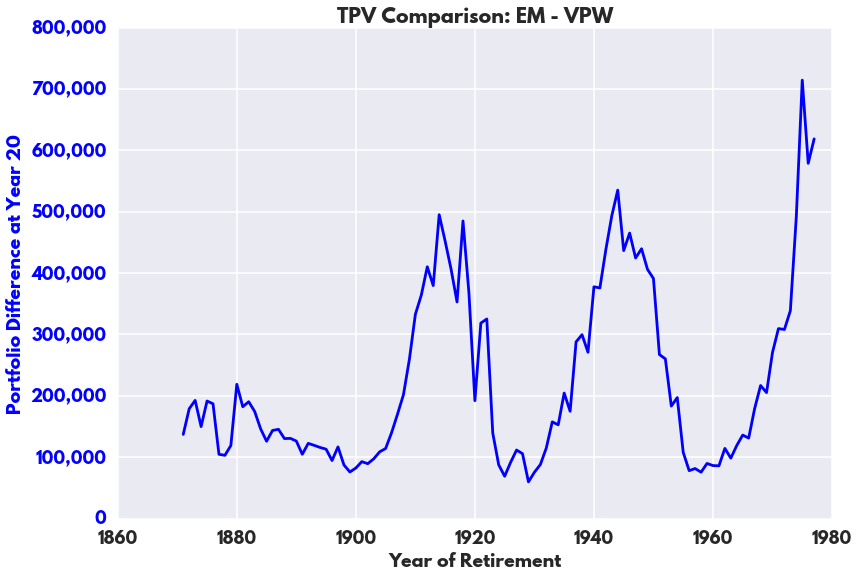

In [5]:
from plot import format_axis_labels_with_commas

data_series = Returns_US_1871()

tpv_diff = []
YEARS = 40
for i in range(data_series.years_of_data):
    year = i + 1871

    (s1, s2) = itertools.tee(data_series.iter_from(year))
    x = simulate_withdrawals(s1, years=YEARS)
    y = simulate_withdrawals(s2, years=YEARS, withdraw=VPW)

    # skip incomplete retirements
    if len(x) < 40:
        continue

    tpv_diff.append(x[19].portfolio_r - y[19].portfolio_r)

x_values = range(1871, 1871 + len(tpv_diff))

fig, ax1 = plt.subplots()
format_axis_labels_with_commas(ax1.get_yaxis())
ax1.plot(x_values, tpv_diff, 'b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax1.set_ylabel('Portfolio Difference at Year 20', color='b')
ax1.set_xlabel('Year of Retirement')

plt.title('TPV Comparison: EM - VPW')

plt.show()